In [1]:
import pandas as pd # Importamos Pandas con el alias de pd  (estandar) para el manejo de datos
import numpy as np # Importamos Numpy con el alias de np (estandar) para algebra lineal


# Algoritmos empleados
# ==============================================================================
import sklearn 
from sklearn import linear_model # Importamos el modelo de Regresión logistica
from sklearn.neighbors import KNeighborsClassifier # Importamos el modelo de Vecinos cercanos KNN
from sklearn import svm # Importamos el modelo de Maquinas de Soporte Vectorial SVM
from sklearn.naive_bayes import GaussianNB # Importamos el modelo de Bayes ingenuo Naives Bayes


from sklearn import model_selection # Importamos la libreria de validación de modelos
from sklearn.metrics import classification_report # Importamos la libreria de reportes de clasificación
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix # Importamos la libreria de matriz de confusión
from sklearn.metrics import accuracy_score # Importamos la libreria de precisión del modelo

# Gráficos
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt # Importamos la libreria de gráficos
import seaborn as sns # Importamos la libreria de gráficos de seaborn
%matplotlib inline 

#### Carga de Datos 

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Estadísticas

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### Correlación entre variables

In [5]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
corr_matrix = df.corr(method='pearson') # Calculamos la matriz de correlación de Pearson
corr_matrix

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000


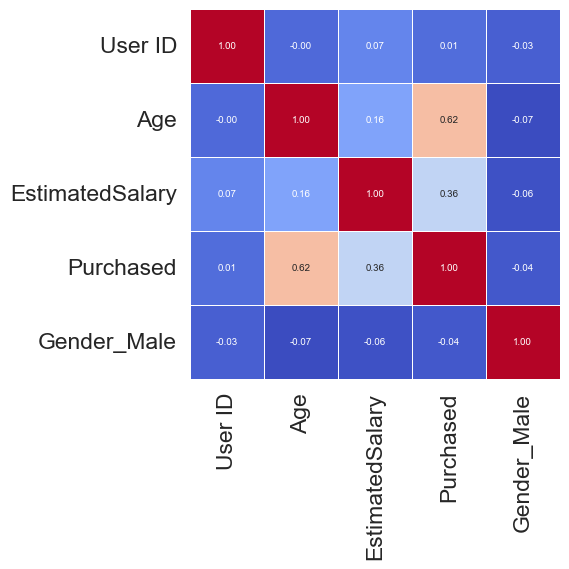

In [6]:
sns.set(font_scale=1.5) # Establecer el tamaño de la fuente
sns.heatmap(
    corr_matrix, xticklabels='auto', yticklabels='auto', cmap='coolwarm', annot=True, fmt='.2f', # Crear mapa de calor
    cbar=False, # No mostrar barra de color
    square=True, # Ajustar celdas a cuadradas
    annot_kws={'size': 7}, # Tamaño de los valores
    linewidth=.5, # Ancho de las líneas entre celdas
)

plt.show() 

In [7]:
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


#### División entrenamiento-test

In [11]:
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, 3].values

In [12]:
print("Variables independientes:", X) # Mostramos las variables independientes
print("\nVariable dependiente:", y) # Mostramos la variable dependiente

Variables independientes: [[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [   

In [13]:
# Dividimos el dataset en training y test 
from sklearn.model_selection import train_test_split # Importamos la libreria de división de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # Dividimos el dataset en training y test en un 75% y 25% respectivamente

In [14]:
from sklearn.preprocessing import StandardScaler # Importamos la libreria de escalado de características
sc = StandardScaler() # Creamos el objeto de escalado
X_train = sc.fit_transform(X_train) # Escalamos las características de entrenamiento
X_test = sc.transform(X_test)

In [15]:
print("\nX Entrenamiento:",X_train) 
print("\ny test:",y_test)


X Entrenamiento: [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648

### Modelo de Regresión Logística

In [16]:
modelo_rl = linear_model.LogisticRegression()

In [17]:
modelo_rl.fit(X_train, y_train)

LogisticRegression()

#### Validación del modelo

In [18]:
y_pred = modelo_rl.predict(X_test) # Predecimos con el modelo de Regresión logistica
#Muestro las 5 primeras predicciones
print(y_pred[0:5])

[0 0 0 0 0]


In [19]:
algoritmo = 'Regresión Logistica'
# Calculo score del modelo con el set de entrenamiento
train_score = modelo_rl.score(X_train, y_train)
# Calculo score del modelo con el set de prueba
test_score = modelo_rl.score(X_test, y_test)

print("{} precisión del set de entrenamiento: {}".format(algoritmo, train_score))
print("{} precisión del set de prueba: {}".format(algoritmo, test_score))

Regresión Logistica precisión del set de entrenamiento: 0.8233333333333334
Regresión Logistica precisión del set de prueba: 0.89


#### Matriz de confusión

In [20]:
cm = confusion_matrix(y_test, y_pred)

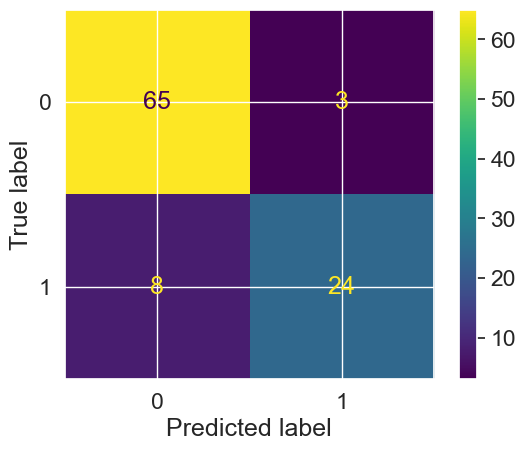

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay # Importamos la libreria de visualización de matriz de confusión
disp= ConfusionMatrixDisplay (confusion_matrix=cm)  # Creamos el objeto de visualización de matriz de confusión
disp.plot()  # Mostramos la matriz de confusión
plt.show() # Mostramos el gráfico

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

